In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
nl_mc4 = load_dataset("yhavinga/mc4_nl_cleaned", 'micro')

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [3]:
from datasets import concatenate_datasets
nl_mc4 = concatenate_datasets(list(nl_mc4.values()))

In [4]:
section = nl_mc4#['train'].select(range(200000))

In [5]:
import pandas as pd
df = section.to_pandas()

In [6]:
del section
del nl_mc4

In [7]:
df

,text,timestamp,url
0,Japanse bedrijven zijn niet alleen hondstrouw ...,2019-02-22T15:37:25Z,https://ondernemingen.bnpparibasfortis.be/nl/a...
1,Op een rustige locatie in de kindvriendelijke ...,2017-01-23T00:30:06Z,http://www.jaap.nl/te-koop/overijssel/noord-ov...
2,Gerrit Schotte zit vast. Vanochtend meldde de ...,2020-01-29T03:25:31Z,https://www.knipselkrant-curacao.com/curacaoni...
3,Op een nieuwe computer met een 500 GB ssd heb ...,2019-11-22T09:58:25Z,https://forum.ubuntu-nl.org/index.php?topic=10...
4,Er zijn geen vastgoedbeheerders in Odoornervee...,2019-10-14T10:47:53Z,https://vastgoedbeheer.online/dr/odoornerveen
...,...,...,...
142122,De dag voor mijn vertrek heeft Nederland te ma...,2019-02-19T11:50:48Z,https://www.zonvaart.nl/nl/Reisverhalen/Het-ec...
142123,"Schreiben Sie den ersten Kommentar zu ""Gezonde...",2020-04-07T23:26:50Z,https://www.weltbild.de/artikel/ebook/gezonde-...
142124,In Deventer hebben Karlo Timmerman (SOS Kinder...,2019-03-20T15:23:50Z,http://www.schaatspeloton.nl/nieuws/nieuws.php...
142125,ik vrees dat niemand van de fokregio's nog act...,2017-08-22T20:55:35Z,http://forum.fok.nl/topic/2161945/4/25


In [8]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.9 MB/s eta 0:00:00


In [9]:
import emoji
# Function to check if a string contains emojis
def contains_emoji(text):
    return bool(emoji.demojize(text) != text)

# Apply the function to the 'text' column and filter out rows containing emojis
no_emojis_df = df[~df['text'].apply(contains_emoji)]



In [10]:
del df
no_emojis_df

,text,timestamp,url
0,Japanse bedrijven zijn niet alleen hondstrouw ...,2019-02-22T15:37:25Z,https://ondernemingen.bnpparibasfortis.be/nl/a...
1,Op een rustige locatie in de kindvriendelijke ...,2017-01-23T00:30:06Z,http://www.jaap.nl/te-koop/overijssel/noord-ov...
2,Gerrit Schotte zit vast. Vanochtend meldde de ...,2020-01-29T03:25:31Z,https://www.knipselkrant-curacao.com/curacaoni...
3,Op een nieuwe computer met een 500 GB ssd heb ...,2019-11-22T09:58:25Z,https://forum.ubuntu-nl.org/index.php?topic=10...
4,Er zijn geen vastgoedbeheerders in Odoornervee...,2019-10-14T10:47:53Z,https://vastgoedbeheer.online/dr/odoornerveen
...,...,...,...
142122,De dag voor mijn vertrek heeft Nederland te ma...,2019-02-19T11:50:48Z,https://www.zonvaart.nl/nl/Reisverhalen/Het-ec...
142123,"Schreiben Sie den ersten Kommentar zu ""Gezonde...",2020-04-07T23:26:50Z,https://www.weltbild.de/artikel/ebook/gezonde-...
142124,In Deventer hebben Karlo Timmerman (SOS Kinder...,2019-03-20T15:23:50Z,http://www.schaatspeloton.nl/nieuws/nieuws.php...
142125,ik vrees dat niemand van de fokregio's nog act...,2017-08-22T20:55:35Z,http://forum.fok.nl/topic/2161945/4/25


In [11]:
from nltk.tokenize import sent_tokenize

def split_into_sentences(text):
    return sent_tokenize(text)

In [12]:
import nltk
nltk.download('punkt')
def make_sentence_df(df, text_column_name):
    df['sentences'] = df[text_column_name].apply(split_into_sentences)
    df['num_sentences'] = df['sentences'].apply(len)
    df_exploded = df.explode('sentences')
    # Initialize an empty list to store problematic entries
    problematic_entries = []

    # Calculate the number of words using a custom function
    def count_words(sentence):
        try:
            return len(sentence.split())
        except AttributeError:
            return None  # Handle problematic entries as NaN

    df_exploded['num_words'] = df_exploded['sentences'].apply(count_words)
    df_exploded = df_exploded[~df_exploded['num_words'].isna()]
    # Remove the problematic entries from df_exploded
    #df_exploded = df_exploded.dropna(subset=['sentences'])

    return df, df_exploded

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
no_emojis_df

,text,timestamp,url
0,Japanse bedrijven zijn niet alleen hondstrouw ...,2019-02-22T15:37:25Z,https://ondernemingen.bnpparibasfortis.be/nl/a...
1,Op een rustige locatie in de kindvriendelijke ...,2017-01-23T00:30:06Z,http://www.jaap.nl/te-koop/overijssel/noord-ov...
2,Gerrit Schotte zit vast. Vanochtend meldde de ...,2020-01-29T03:25:31Z,https://www.knipselkrant-curacao.com/curacaoni...
3,Op een nieuwe computer met een 500 GB ssd heb ...,2019-11-22T09:58:25Z,https://forum.ubuntu-nl.org/index.php?topic=10...
4,Er zijn geen vastgoedbeheerders in Odoornervee...,2019-10-14T10:47:53Z,https://vastgoedbeheer.online/dr/odoornerveen
...,...,...,...
142122,De dag voor mijn vertrek heeft Nederland te ma...,2019-02-19T11:50:48Z,https://www.zonvaart.nl/nl/Reisverhalen/Het-ec...
142123,"Schreiben Sie den ersten Kommentar zu ""Gezonde...",2020-04-07T23:26:50Z,https://www.weltbild.de/artikel/ebook/gezonde-...
142124,In Deventer hebben Karlo Timmerman (SOS Kinder...,2019-03-20T15:23:50Z,http://www.schaatspeloton.nl/nieuws/nieuws.php...
142125,ik vrees dat niemand van de fokregio's nog act...,2017-08-22T20:55:35Z,http://forum.fok.nl/topic/2161945/4/25


In [14]:
nl_cleaned_mc4, nl_cleaned_mc4_sentences = make_sentence_df(no_emojis_df, 'text')

<ipython-input-12-0fcd75a81855>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df[text_column_name].apply(split_into_sentences)
<ipython-input-12-0fcd75a81855>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['sentences'].apply(len)


In [27]:
#trial and error
nl_cleaned_mc4['num_sentences'][0:4120].sum()

100087

In [28]:
nl_cleaned_mc4[0:4120].to_csv('nl_cleaned_mc4_100k_sentences.csv', encoding='utf-8', escapechar='\\')
#nl_cleaned_mc4_sentences.to_csv('nl_cleaned_mc4_sentences.csv', encoding='utf-8', escapechar='\\')


In [ ]:
nl_cleaned_mc4_500k_sentences

,text,timestamp,url,sentences,num_sentences,num_words
0,Japanse bedrijven zijn niet alleen hondstrouw ...,2019-02-22T15:37:25Z,https://ondernemingen.bnpparibasfortis.be/nl/a...,Japanse bedrijven zijn niet alleen hondstrouw ...,18,17
0,Japanse bedrijven zijn niet alleen hondstrouw ...,2019-02-22T15:37:25Z,https://ondernemingen.bnpparibasfortis.be/nl/a...,Alleen is het niet zo makkelijk er een voet tu...,18,14
0,Japanse bedrijven zijn niet alleen hondstrouw ...,2019-02-22T15:37:25Z,https://ondernemingen.bnpparibasfortis.be/nl/a...,Met de volgende tips hebt u alvast een streepj...,18,10
0,Japanse bedrijven zijn niet alleen hondstrouw ...,2019-02-22T15:37:25Z,https://ondernemingen.bnpparibasfortis.be/nl/a...,In Japan draait alles om vertrouwen.,18,6
0,Japanse bedrijven zijn niet alleen hondstrouw ...,2019-02-22T15:37:25Z,https://ondernemingen.bnpparibasfortis.be/nl/a...,Neem voldoende tijd om een relatie op te bouwe...,18,18
...,...,...,...,...,...,...
199999,Fijn dat Mari Vervaart op deze mogelijke uitwe...,2020-04-09T14:20:44Z,https://www.hhbest.nl/2011/09/29/bests-erfgoed/,"of voorstellingen in een krap zaaltje, ik moet...",24,12
199999,Fijn dat Mari Vervaart op deze mogelijke uitwe...,2020-04-09T14:20:44Z,https://www.hhbest.nl/2011/09/29/bests-erfgoed/,Een sportman kan goede prestaties leveren als ...,24,49
199999,Fijn dat Mari Vervaart op deze mogelijke uitwe...,2020-04-09T14:20:44Z,https://www.hhbest.nl/2011/09/29/bests-erfgoed/,Daarom zou het verdwijnen van ’t Tejaterke een...,24,44
199999,Fijn dat Mari Vervaart op deze mogelijke uitwe...,2020-04-09T14:20:44Z,https://www.hhbest.nl/2011/09/29/bests-erfgoed/,Omliggende gemeentes hebben grote theaterzalen...,24,31


In [ ]:
import pandas as pd

def calculate_word_statistics(df, column_name):
    # Calculate the number of words in each entry

    # Calculate the mean and standard deviation of the number of words per entry
    mean_words = df['num_words'].mean()
    std_words = df['num_words'].std()
    median_words = df['num_words'].median()
    min_words = df['num_words'].min()
    max_words = df['num_words'].max()
    percentile_25 = df['num_words'].quantile(0.25)
    percentile_75 = df['num_words'].quantile(0.75)
    percentile_5 = df['num_words'].quantile(0.05)
    percentile_95 = df['num_words'].quantile(0.95)

    print("Average number of words per entry:", mean_words)
    print("Standard deviation of words per entry:", std_words)
    print("Median number of words per entry:", median_words)
    print("Minimum number of words per entry:", min_words)
    print("Maximum number of words per entry:", max_words)
    print("25th percentile of words per entry:", percentile_25)
    print("75th percentile of words per entry:", percentile_75)
    print("5th percentile of words per entry:", percentile_5)
    print("95th percentile of words per entry:", percentile_95)

    # Return the calculated statistics
    return mean_words, std_words, median_words, min_words, max_words, percentile_25, percentile_75, percentile_5, percentile_95

# Assuming you have a DataFrame called 'preprocessed_df'
mean_words, std_words, median_words, min_words, max_words, percentile_25, percentile_75, percentile_5, percentile_95 = calculate_word_statistics(nl_cleaned_mc4_500k_sentences, 'sentences')

Average number of words per entry: 15.068227295968287
Standard deviation of words per entry: 9.971985299219224
Median number of words per entry: 13.0
Minimum number of words per entry: 1
Maximum number of words per entry: 1518
25th percentile of words per entry: 9.0
75th percentile of words per entry: 19.0
5th percentile of words per entry: 4.0
95th percentile of words per entry: 32.0


In [ ]:
import matplotlib.pyplot as plt
def plot_distribution(df, max_x=50):

    # Sample DataFrame

    # Extract the column of interest
    data = df['num_words']
    # Count the occurrences of each unique value
    value_counts = data.value_counts()

    # Plot the bar chart
    plt.bar(value_counts.index, value_counts.values, color='g', alpha=0.6)
    plt.xlabel('Words in sentence')
    plt.ylabel('Frequency')
    plt.title('Frequency of entry length')
    plt.grid(True)

    # Set x-axis limits to focus on the majority of the points between 0 and 100
    plt.xlim(0, max_x)

    plt.show()

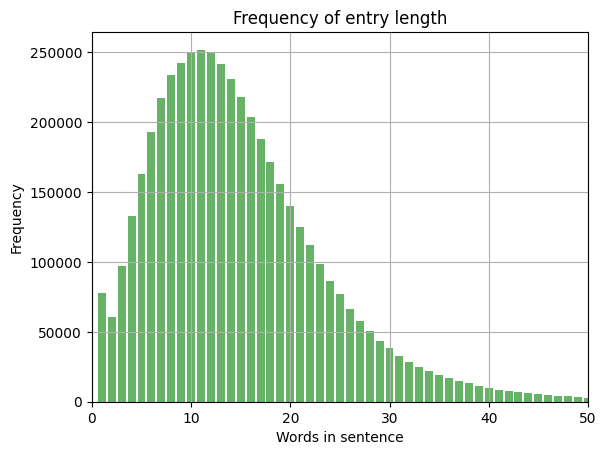

In [ ]:
plot_distribution(nl_cleaned_mc4_500k_sentences, 50)

In [ ]:
sample_nl_mc4_500k = nl_cleaned_mc4_500k_sentences[['sentences', 'num_words']]#.sample(50000)

In [ ]:
sample_nl_mc4_500k.to_csv('nl_mc4_cleaned_sentences_12M.csv', encoding='utf-8', escapechar='\\')

In [ ]:
sample_nl_mc4_500k

,sentences,num_words
0,Japanse bedrijven zijn niet alleen hondstrouw ...,17
0,Alleen is het niet zo makkelijk er een voet tu...,14
0,Met de volgende tips hebt u alvast een streepj...,10
0,In Japan draait alles om vertrouwen.,6
0,Neem voldoende tijd om een relatie op te bouwe...,18
...,...,...
499999,Dan kunt u gebruik maken van NewsBot.,7
499999,Het is ook mogelijk om eigen script toe te voe...,17
499999,Als u wenst mag er gebruik gemaakt worden van ...,26
499999,Hier voor is een Aka chatkamer voor aangemaakt.,8
